In [9]:
from load_data import generate_pair_sets
from Visualization import plot_pairs, plot_single
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
train_data, train_target, train_classes, test_data, test_target, test_classes = generate_pair_sets(10)

In [3]:
print(
    train_data.shape,
    train_classes.shape,
    train_target.shape
)
print(
    test_data.shape,
    test_classes.shape,
    test_target.shape
)

torch.Size([10, 2, 14, 14]) torch.Size([10, 2]) torch.Size([10])
torch.Size([10, 2, 14, 14]) torch.Size([10, 2]) torch.Size([10])


larger is 0; smaller or equal is 1

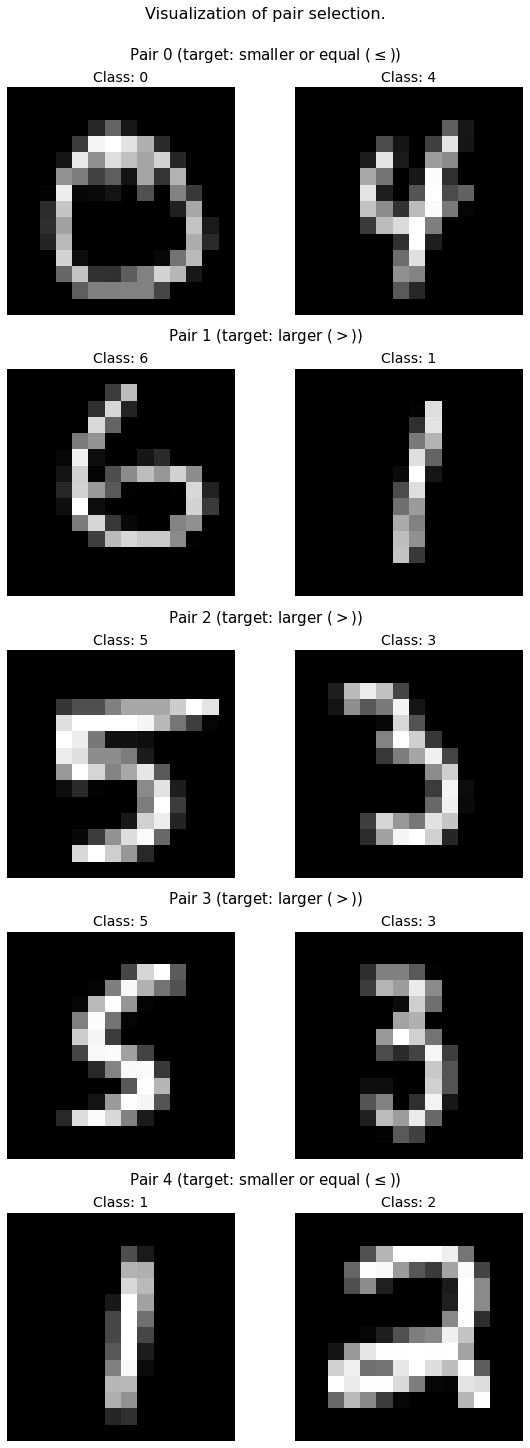

In [4]:
plot_pairs(5, train_data, train_classes, train_target)

torch.Size([10, 14, 28])


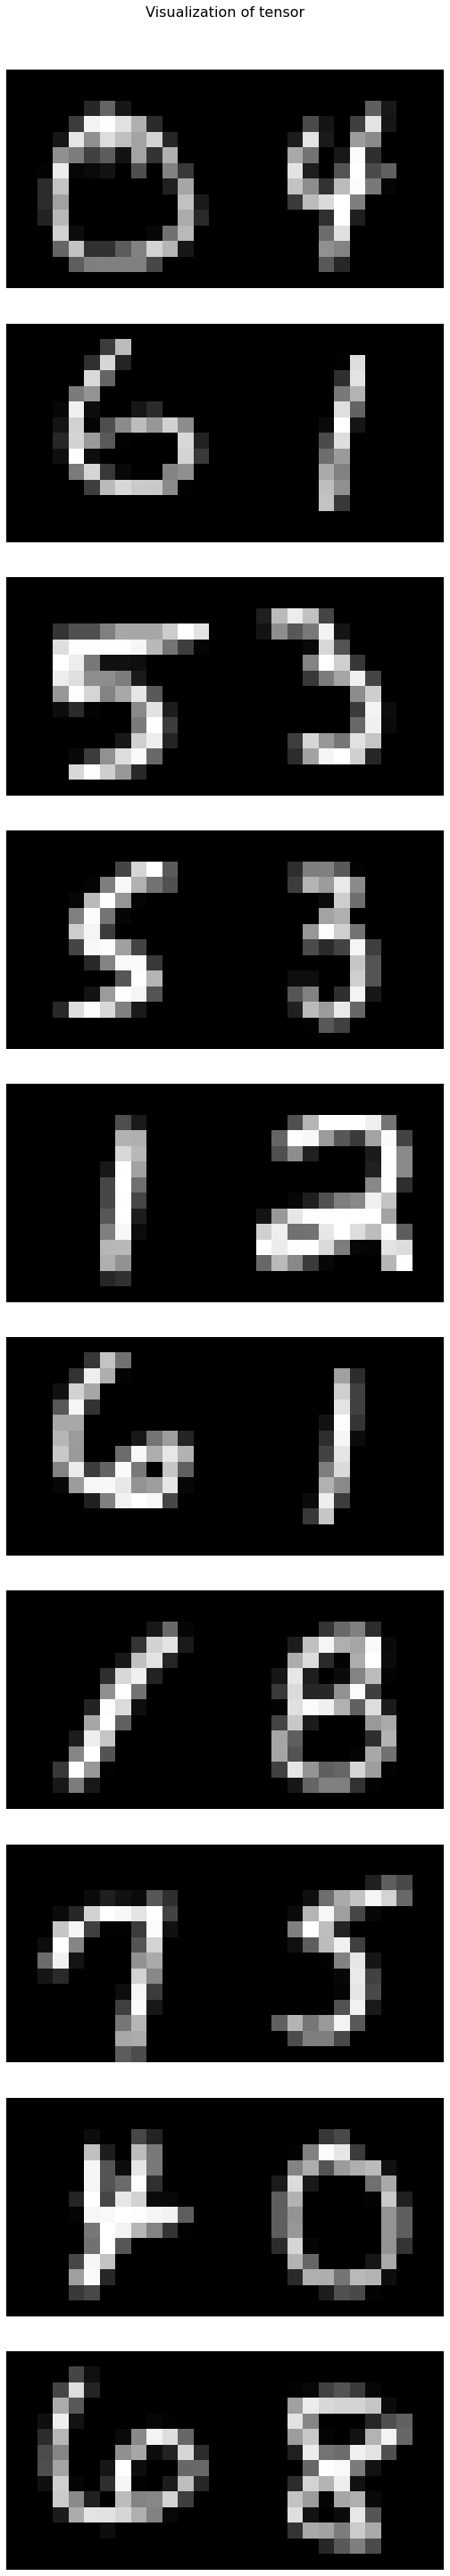

In [6]:
test_tensor = train_data
test_tensor = torch.cat((test_tensor[:, 0, :,:], test_tensor[:,1, :, :]), 2)
print(test_tensor.shape)
plot_single(test_tensor)

Sanity check for concatenating the tensors before feeding them to Conv2d layers.

In [13]:
model = torch.nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=5), 
        nn.Conv2d(32, 64, kernel_size=5),
        nn.MaxPool2d(2, stride = 2),
        nn.Conv2d(64, 64, kernel_size=1),
        nn.MaxPool2d(2, stride = 2),
        nn.Flatten())

output = model(test_tensor.unsqueeze(1))
print(output.shape)

torch.Size([10, 320])
